In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import timeit
from sklearn.metrics import mean_squared_error

In [2]:
# Activation functions
def ReLU(x):
    return x * (x > 0)

def Sig(x):
    return 1/(1+np.exp(-x))

def onehot(X):
    T = np.zeros((X.shape[0],np.max(X)+1))
    T[np.arange(len(X)),X] = 1 #Set T[i,X[i]] to 1
    return T

# feed forward function
def ff(w0,w1,w2,b0,b1,b2,x):
    # First Hidden calculations
    h0 = x.dot(w0)+ b0 
    h0 = ReLU(h0)
 
  # Second Hidden calculations
    h1 = h0.dot(w1) + b1
    h1 = ReLU(h1)

  # output calculations
    ff = h1.dot(w2) + b2
    ff = Sig(ff)
    return ff

In [3]:
# data preprocessing
xtrain = np.loadtxt('xtrain.txt', delimiter=',')
xtrain /= 255
ytrain = np.loadtxt('ytrain.txt', delimiter=',').astype(int)
ytrain = onehot(ytrain)
xtest = np.loadtxt('xtest.txt', delimiter=',')
xtest /= 255
ytest = np.loadtxt('ytest.txt', delimiter=',').astype(int)

In [4]:
# randomly-chosen set of weights and biase
s = 0.2
W0 = (np.random.rand(784,512)-0.5)*s
W1 = (np.random.rand(512,512)-0.5)*s
W2 = (np.random.rand(512,10)-0.5)*s

B0 = (np.random.rand(512,)-0.5)*s
B1 = (np.random.rand(512,)-0.5)*s
B2 = (np.random.rand(10,)-0.5)*s

In [5]:
#backpropagation and Gradient Descent
error = []
start = timeit.default_timer()
for i in range (1000):    
    #randomly chosen subset
    k = np.random.randint(60000, size=1000)
    x_b = xtrain[k,:]
    y_b = ytrain[k,]
    
    # computing forward pass
    H0 = ReLU(x_b.dot(W0)+ B0)
 
    # Second Hidden calculations
    H1 = ReLU(H0.dot(W1) + B1)

    # output calculations
    P = Sig(H1.dot(W2) + B2)
    
    # error
    error.append(mean_squared_error(y_b, P))
    
    # error gradient for last layer
    dP = (y_b - P) * P * (1-P)
    
    #Compute error gradient for hidden layers
    dH1 = (dP .dot(np.transpose(W2)))* np.sign(H1)
    dH0 =(dH1.dot(np.transpose(W1)))* np.sign(H0)
    
    #Update weights and biases
    l = 0.001
    W2 = W2 + l * (np.transpose(H1).dot(dP))
    W1 = W1 + l * (np.transpose(H0).dot(dH1))
    W0 = W0 + l * (np.transpose(x_b).dot(dH0))

    B2 = B2 + l * dP.sum(axis = 0)
    B1 = B1 + l * dH1.sum(axis = 0)
    B0 = B0 + l * dH0.sum(axis = 0)
 
stop = timeit.default_timer()
print('running time: ', round(stop - start,2), 's')

running time:  77.77 s


In [6]:
# test 
Output = ff(W0,W1,W2,B0,B1,B2,xtest)
Output = np.argmax(Output, axis = 1)

#Accuracy
accuracy = (np.count_nonzero(Output==ytest)/10000 ) * 100     
print('accuracy:', round(accuracy,2), '%') 

accuracy: 96.78 %


In [7]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix        
cm = confusion_matrix(Output, ytest)    
print(cm)

[[ 969    0    7    1    1    5   10    1    4    6]
 [   0 1120    1    1    0    1    3    9    2    6]
 [   1    3 1000    7    3    1    2   14    3    2]
 [   3    2    5  974    0    7    1    1   10   10]
 [   1    0    2    0  958    2    3    3    4   13]
 [   1    2    1   11    0  863    9    1    9    6]
 [   2    4    5    0    6    7  927    0   12    2]
 [   2    1    7   10    3    1    2  993    6   10]
 [   1    3    4    4    2    2    1    1  922    2]
 [   0    0    0    2    9    3    0    5    2  952]]


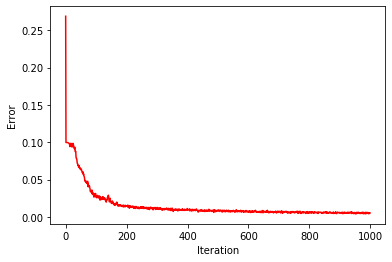

In [8]:
# plot error vs iterations
plt.plot( error, 'r')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()